In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.api.types import is_numeric_dtype
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error, accuracy_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
dataset = pd.read_csv("kc_house_data.csv")
dataset.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [71]:
dataset.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [3]:
dataset = dataset.drop(columns=['id', 'date', 
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'])


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff0f187fe10>,
      dtype=object)

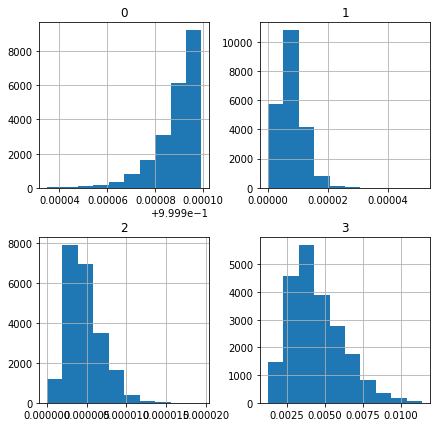

In [117]:
dataset.hist(figsize = (7,7))

In [4]:
from sklearn.preprocessing import normalize
dataset = normalize(dataset)
dataset = pd.DataFrame(dataset)

In [82]:
dataset.describe()

,price,bedrooms,bathrooms,sqft_living
count,2.161300e+04,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736
std,3.671272e+05,0.930062,0.770163,918.440897
min,7.500000e+04,0.000000,0.000000,290.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000
max,7.700000e+06,33.000000,8.000000,13540.000000


In [5]:
X = dataset.iloc[:,1:]
y = dataset.iloc[:,:1]

In [119]:
X.shape, y.shape

((21613, 3), (21613, 1))

In [120]:
X.shape, y.shape
# Splitting the dataset into the Training set and Test set
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [6]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
# X_test = sc.transform(X_test)

In [7]:
# Import linear regression class
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(X, y)

# y_pred_test = regression.predict(X_test)
y_pred_train = regression.predict(X)

In [8]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = regression, X = X, y = y, cv = 10)
accuracies.mean()
accuracies.std()
print(accuracies)
print("Total accuracy : ",accuracies.mean())
print("Standard Deviation : ",accuracies.std())

[0.95104615 0.95008547 0.95198065 0.94642042 0.95119548 0.94751012
 0.95090683 0.94870505 0.94912477 0.95415831]
Total accuracy :  0.9501133259244632
Standard Deviation :  0.0021423152257748447
